In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets,optimizers
import numpy as np
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout,BatchNormalization


In [2]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [3]:
X_train,X_test=X_train/255.0,X_test/255.0   #normalizing the data

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

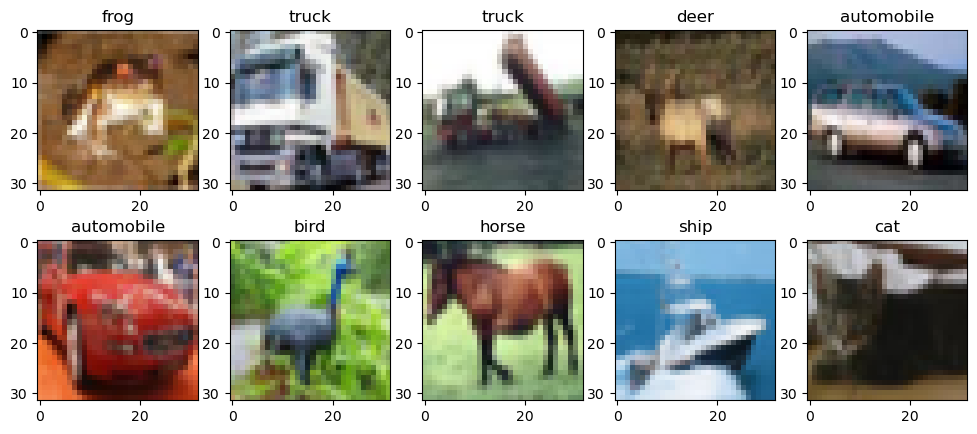

In [5]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[Y_train.reshape(-1,)[i]])

In [6]:
X_train.reshape(-1,)

array([0.23137255, 0.24313725, 0.24705882, ..., 0.63921569, 0.63921569,
       0.63137255])

In [7]:
X_test.reshape(-1,)

array([0.61960784, 0.43921569, 0.19215686, ..., 0.10588235, 0.10196078,
       0.10196078])

In [8]:
Y_test.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
Y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [12]:
def lr_scheduler(epoch,learning_rate):
    if epoch < 5:
        return float(learning_rate)
    else:
        new_lr=learning_rate* tf.math.exp(-0.1)
        return float(new_lr)
        

# This function adjusts the learning rate based on the current epoch.
# It keeps the initial learning rate for the first 5 epochs and then exponentially decays it.

In [13]:
ann_model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)])

C:\Users\Prathamesh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
ann_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
Lr_scheduler_callback = LearningRateScheduler(lr_scheduler,verbose=1)

In [18]:
History=ann_model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),callbacks=[Lr_scheduler_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6300 - loss: 1.0428 - val_accuracy: 0.6493 - val_loss: 0.9669 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6789 - loss: 0.9065 - val_accuracy: 0.6900 - val_loss: 0.8777 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7077 - loss: 0.8350 - val_accuracy: 0.6284 - val_loss: 1.0703 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7297 - loss: 0.7625 - val_accuracy: 0.6947 - val_loss: 0.8890 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to

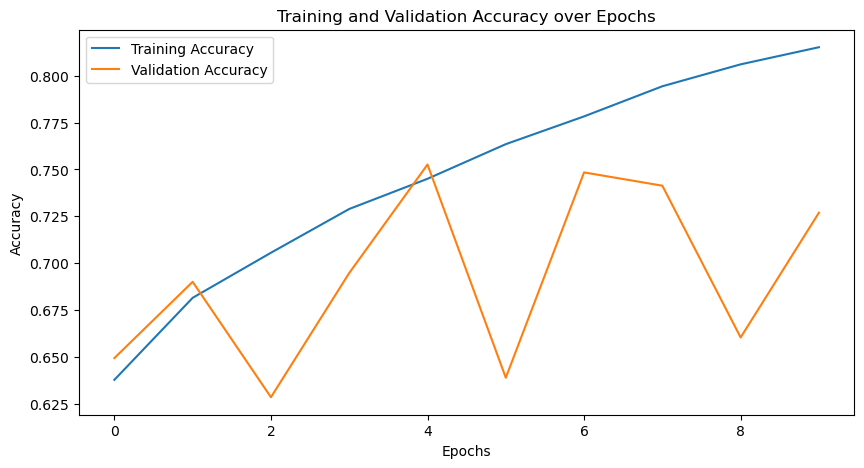

In [19]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

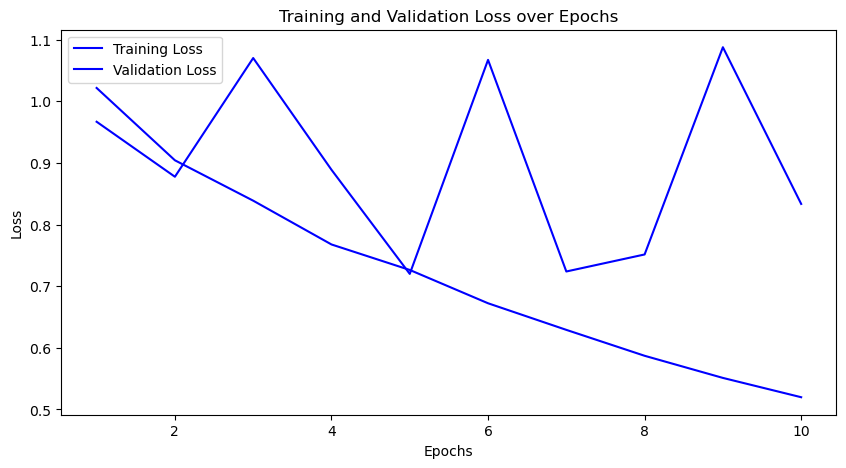

In [20]:
# Step 6: Plot the graphs
# Plotting training and validation loss

train_loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1, len(train_loss)+1)
plt.figure(figsize=(10, 5))

plt.plot(epochs,train_loss,'b', label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [21]:
# On Test-Set
loss, accu = ann_model.evaluate(X_test, Y_test)
print('Accuracy: ',accu*100,'%')
print('Loss: ', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7324 - loss: 0.8180
Accuracy:  72.68999814987183 %
Loss:  0.8335343599319458


In [22]:
ann_model.save('Cifar10.h5')

In [23]:
from sklearn.metrics import classification_report
y_pred = ann_model.predict(X_test)
y_predclasses=np.argmax(y_pred, axis=1) 
print("Classification Report:\n", classification_report(Y_test, y_predclasses))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.74      0.92      0.82      1000
           2       0.65      0.65      0.65      1000
           3       0.62      0.48      0.54      1000
           4       0.78      0.64      0.70      1000
           5       0.80      0.51      0.62      1000
           6       0.87      0.72      0.78      1000
           7       0.73      0.83      0.78      1000
           8       0.66      0.90      0.76      1000
           9       0.77      0.84      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000

